In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib as mpl
import seaborn as sns
sns.set_style("whitegrid")
%config InlineBackend.figure_formats = ['svg']
tab20b = plt.colormaps.get('tab20b')

In [9]:
def dat2arr(dat, Nx, Ny, dx, dy):
    runtime_arr = np.zeros([Nx, Ny])
    count = np.zeros([Nx, Ny])
    for d in dat:
        i = int(d[0]/dx) - 1
        j = int(d[1]/dy) - 1
        if i < Nx and j < Ny:
            runtime_arr[i, j] += d[2]
            count[i, j] += 1
    runtime_arr /= count
    return runtime_arr

In [10]:
## load data
fps_seq = np.loadtxt("../data/runtime_seq.txt")
fps_mpi = np.loadtxt("../data/runtime_mpi.txt")
fps_omp = np.loadtxt("../data/runtime_omp.txt")
fps_pth = np.loadtxt("../data/runtime_pth.txt")
fps_cu = np.loadtxt("../data/runtime_cuda.txt")

## define parameters
xstep = 50
ystep = 1
xmin  = int(min(fps_mpi[:, 0]) / xstep)
xmax  = int(max(fps_mpi[:, 0]) / xstep)
ymin  = int(min(fps_mpi[:, 1]) / ystep)
ymax  = int(max(fps_mpi[:, 1]) / ystep)
Nx    = xmax - xmin + 1
Ny    = ymax - ymin + 1
xticks = (xmin + np.array(list(range(Nx)))) * xstep
yticks = (ymin + np.array(list(range(Ny)))) * ystep
xticks = np.int64(xticks)
yticks = np.int64(yticks)

## define parameters (cuda)
xstep_cu = 100
ystep_cu = 1
xmin_cu  = int(min(fps_cu[:, 0]) / xstep_cu)
xmax_cu  = int(max(fps_cu[:, 0]) / xstep_cu)
ymin_cu  = int(min(fps_cu[:, 1]) / ystep_cu)
ymax_cu  = int(max(fps_cu[:, 1]) / ystep_cu)
Nx_cu    = xmax_cu - xmin_cu + 1
Ny_cu    = ymax_cu - ymin_cu + 1
xticks_cu = (xmin_cu + np.array(list(range(Nx_cu)))) * xstep_cu
yticks_cu = (ymin_cu + np.array(list(range(Ny_cu)))) * ystep_cu
xticks_cu = np.int64(xticks_cu)
yticks_cu = np.int64(yticks_cu)

## convert data to arrays
fps_arr_seq = dat2arr(fps_seq, Nx, 1, xstep, 1)
fps_arr_mpi = dat2arr(fps_mpi, Nx, Ny, xstep, ystep)
fps_arr_omp = dat2arr(fps_omp, Nx, Ny, xstep, ystep)
fps_arr_pth = dat2arr(fps_pth, Nx, Ny, xstep, ystep)
fps_arr_cu  = dat2arr(fps_cu, Nx_cu, Ny_cu, xstep_cu, ystep_cu)

## converg arrays to dataframes
fps_df_mpi = pd.DataFrame(fps_arr_mpi, columns=yticks, index=xticks)
fps_df_omp = pd.DataFrame(fps_arr_omp, columns=yticks, index=xticks)
fps_df_pth = pd.DataFrame(fps_arr_pth, columns=yticks, index=xticks)

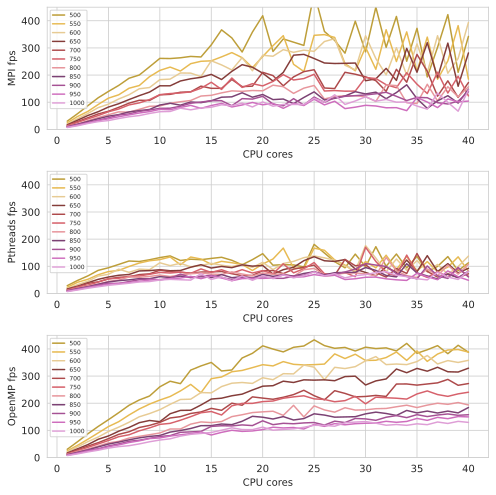

In [20]:
## fps vs core plot
start = 9
end = 20
fig, axes = plt.subplots(3, 1, figsize=[7, 7])
# axes[0].plot(xticks, runtime_arr_seq, label=str(1))
for i in range(start, end):
    axes[0].plot(list(yticks), fps_arr_mpi[i, :], label=str(xticks[i]), color=tab20b.colors[i])
    axes[1].plot(list(yticks), fps_arr_pth[i, :], label=str(xticks[i]), color=tab20b.colors[i])
    axes[2].plot(list(yticks), fps_arr_omp[i, :], label=str(xticks[i]), color=tab20b.colors[i])
for i in range(3):
    axes[i].legend(prop={'size': 6})
    axes[i].set_xlabel("CPU cores")
    axes[i].set_ylim(0, 450)
axes[0].set_ylabel("MPI fps")
axes[1].set_ylabel("Pthreads fps")
axes[2].set_ylabel("OpenMP fps")
plt.tight_layout()
plt.savefig("fps-core-cpu.pdf")

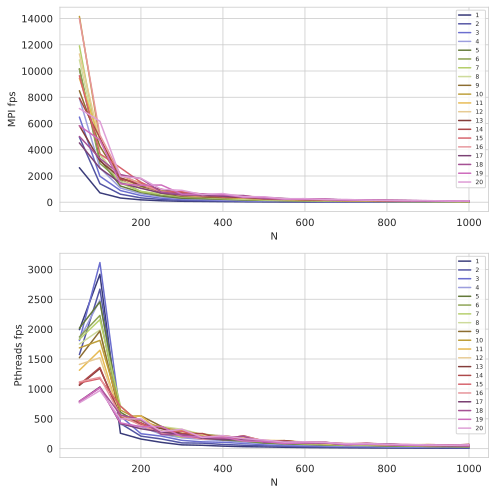

In [27]:
## fps vs size plot
start = 0
end = 20
fig, axes = plt.subplots(2, 1, figsize=[7, 7])
# axes[0].plot(xticks, runtime_arr_seq, label=str(1))
for i in range(start, end):
    axes[0].plot(xticks, fps_arr_mpi[:, i], label=str(yticks[i]), color=tab20b.colors[i])
    axes[1].plot(xticks, fps_arr_pth[:, i], label=str(yticks[i]), color=tab20b.colors[i])
axes[0].legend(prop={'size': 6})
axes[0].set_xlabel("N")
axes[0].set_ylabel("MPI fps")
axes[1].legend(prop={'size': 6})
axes[1].set_xlabel("N")
axes[1].set_ylabel("Pthreads fps")
plt.tight_layout()
plt.savefig("fps-dim-cpu.pdf")

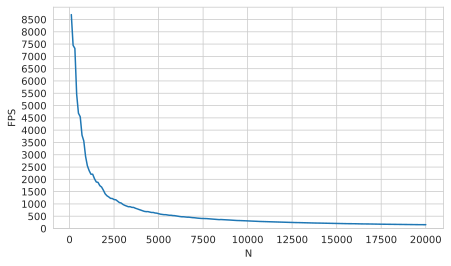

In [39]:
## fps vs size plot
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.plot(xticks_cu, fps_arr_cu[:, 0])
ax.set_xlabel("N")
ax.set_ylabel("FPS")
ax.set_ylim(0, 9000)
ax.set_yticks(range(0, 8800, 500))
plt.savefig("fps-dim-gpu.pdf")